In [1]:
import pandas as pd
import numpy as np
#import dask.dataframe as dd

def load_data():
    df = pd.read_csv('../data/MLParamData_1583906408.4261804_From_MLrn_2020-03-10+00_00_00_to_2020-03-11+00_00_00.h5_processed.csv.gz')
    df=df.replace([np.inf, -np.inf], np.nan)
    df=df.dropna(axis=0)
    return df

df = load_data()

                      time   B:ACMNPG    B:GMPS4V  B:IMINER   B:LINFRQ  \
0  2020-03-10 05:00:00.048  10.000006  123.134498 -0.270313  26.063342   
1  2020-03-10 05:00:00.114  10.000006  119.234494 -0.305312  26.008777   
2  2020-03-10 05:00:00.180  10.000006  142.959518 -0.260313  26.081531   
3  2020-03-10 05:00:00.246  10.000006  133.534509 -0.185312  26.208850   
4  2020-03-10 05:00:00.312  10.000006   94.534470 -0.095312  26.208850   

      B:VIMAX     B:VIMIN  B:VINHBT  B:VIPHAS   B_ACMNPG     B_VIMIN  \
0  966.083496  103.379570       1.0  1.811700  10.000006  103.393158   
1  966.073730  103.421227       1.0  1.812469  10.000006  103.393158   
2  966.037720  103.425453       1.0  1.810874  10.000006  103.393158   
3  966.054077  103.420357       1.0  1.812430  10.000006  103.393158   
4  966.031189  103.412270       1.0  1.813190  10.000006  103.393158   

   B_VINHBT       I:IB     I:MDAT40       I:MXIB  
0       1.0  7055.9375  6977.386446  6974.145508  
1       1.0  7017.18

In [3]:
df['B:VIMIN_MEAN'] = df['B:VIMIN'].rolling(window=15).mean()
df['B:VIMIN_STD']  = df['B:VIMIN'].rolling(window=15).std()
df['B:IMINER_STD'] = df['B:IMINER'].rolling(window=15).std()
df['I:IB_MEAN'] = df['I:IB'].rolling(window=15).mean()

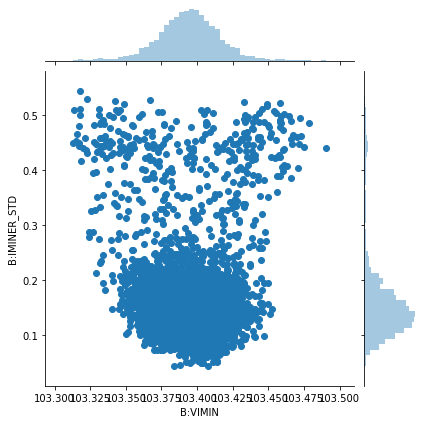

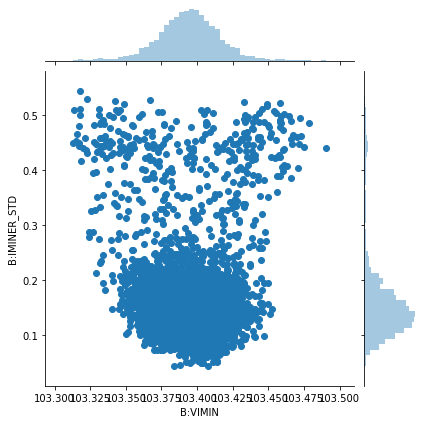

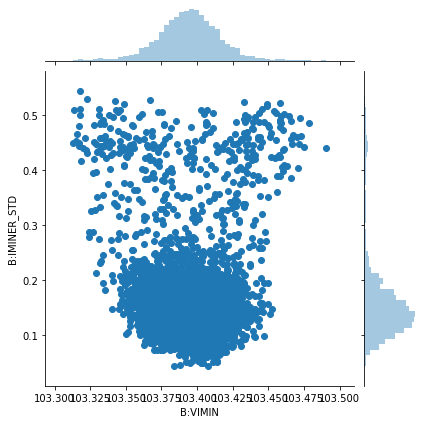

In [218]:
#####################################
## PLOT BASIC CORRELATION FUNCTION ##
#####################################
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
df_s = df.sample(15000)

var_list = ["B:VIMIN", "I:IB", "B:LINFRQ"]
for i in range(len(var_list)):
  sns.jointplot(x=df["B:VIMIN"][0:5000], y=df["B:IMINER_STD"][0:5000], kind='scatter')
            

m= -4.169628698478857
b= 431.20556091216764
5000
5000


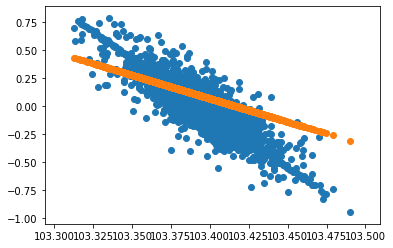

In [116]:
##use linear regression to fit
import statsmodels.api as sm
length=5000
X=df["B:VIMIN"]
y=df["B:IMINER"]
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
y_pred = model.predict(X)
model.summary()
#print(model.params)
b=model.params['const']
m=model.params['B:VIMIN']
print("m=",m)
print("b=",b)

print(len(X[0:length]))
print(len(y[0:length]))
plt.scatter(x=df["B:VIMIN"][0:length],y=df["B:IMINER"][0:length])
#y_pred = m*df["B:VIMIN"]+b
plt.scatter(x=df["B:VIMIN"][0:length],y=y_pred[0:length])

103.30489349 103.49038696
0.8546875 -0.9503125
m=  -9.730800766194232
b=  1006.0940242241055


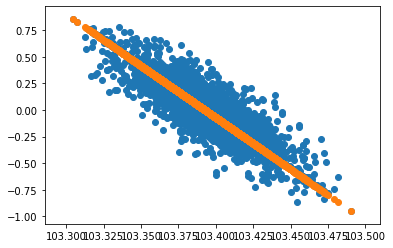

In [95]:
##use 2 points to fit the linear line
##fits better

length=10000
x_min=df["B:VIMIN"][0:length].min()
x_max=df["B:VIMIN"][0:length].max()
y_min=df[df["B:VIMIN"]==x_min]["B:IMINER"].max()
y_max=df[df["B:VIMIN"]==x_max]["B:IMINER"].min()

print(x_min,x_max)
print(y_min,y_max)

m=(y_min-y_max)/(x_min-x_max)
b=y_min-m*x_min
print("m= ",m)
print("b= ",b)

plt.scatter(x=df["B:VIMIN"][0:length],y=df["B:IMINER"][0:length])
X = df["B:VIMIN"]
y_pred = m*X+b
plt.scatter(x=df["B:VIMIN"][0:length],y=y_pred[0:length])

In [366]:
df["IMINER_liner"]=BIMINER_linear(df["B:VIMIN"])
df["IMINER_std"]=df["B:IMINER"]-df["IMINER_liner"]

import random
def BIMINER_linear(x):
  m=-9.730800766194232
  b=1006.0940242241055
  y=m*x+b
  return y

def random_from_cdf(std):
  #print(std)
  hist, bins = np.histogram(std, bins=100)
  #print(hist)
  #print(bins)
  bin_midpoints = bins[:-1] + np.diff(bins)/2
  
  #print("hist")
  cdf = np.cumsum(hist)
  #print(hist)
  cdf = cdf / cdf[-1]
  values = np.random.rand(len(std)*10)
  value_bins = np.searchsorted(cdf, values)
  random_from_cdf = bin_midpoints[value_bins]
  return random_from_cdf


def randomStd(x,df):
  y_std=df[df["B:VIMIN"]>x-0.005]
  y_std=y_std[y_std["B:VIMIN"]<x+0.005]
  y_std=y_std["IMINER_std"]
  return y_std

def BIMINER(x,df):
  y=BIMINER_linear(x)
  y_std = randomStd(x,df)

  r=random_from_cdf(y_std)
  if len(r)>0:
    i=random.randint(0,len(r)-1)
    return y+r[i]
  else:
    return y

y_pred=BIMINER(103.475,df[:5000])

print(y_pred)



-0.7977157771193572


In [303]:



y=BIMINER_linear(103.475)
y_std = randomStd(103.475,df[:5000])

#hist, bins = np.histogram(y_std, bins=100)

#plt.hist(y_std,100)
r=random_from_cdf(y_std)
import random
i=random.randint(0,len(r)-1)
print(r[i])

[ 0.47417529 -0.05604397  0.00286928  0.09391703 -0.05604397  0.01358078
  0.47417529  0.05107103  0.47417529 -0.05604397  0.00822503  0.00286928
 -0.05604397  0.00822503  0.00822503  0.09391703  0.09391703  0.09391703
  0.00286928  0.09391703 -0.05604397  0.00286928  0.00822503  0.00822503
  0.09391703 -0.05604397  0.05107103  0.00822503 -0.05604397  0.47417529
 -0.05604397  0.09391703  0.00822503  0.09391703  0.47417529  0.09391703
  0.09391703  0.47417529 -0.05604397 -0.05604397  0.47417529  0.00286928
  0.05107103  0.05107103  0.01358078  0.09391703  0.09391703  0.47417529
  0.47417529  0.00822503  0.09391703  0.09391703 -0.05604397  0.05107103
  0.00286928  0.05107103  0.00822503  0.09391703  0.47417529  0.47417529
  0.01358078  0.00286928  0.05107103  0.01358078 -0.05604397 -0.05604397
  0.01358078  0.00822503  0.05107103  0.00286928]
0.09391703223975147


In [326]:
## Statistic emulator outputs

length=1000
X=df["B:VIMIN"][0:length]
output=[]
for x in X:
  #print(x)
  y=BIMINER(x,df[0:length])
  output.append(y)
  
  
plt.rcParams["figure.figsize"] = (5,5)
plt.scatter(x=df["B:VIMIN"][0:length],y=df["B:IMINER"][0:length],label="raw")
plt.scatter(X,output,label="emulator")

plt.title('emulator prediction:'+str(length)+' points')
plt.legend()

667262


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide


Text(0.5, 1.0, 'emulator prediction:1000 points')

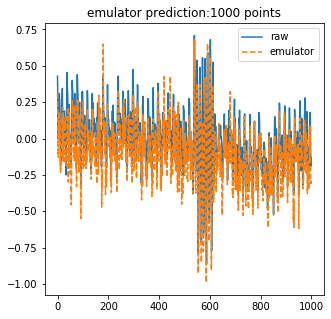

In [367]:
#time series emulator output
duration=1000
start = np.random.randint(0,len(df["B:VIMIN"])-1)
print(start)
X=df["B:VIMIN"][start:start+duration]
Y=df["B:IMINER"][start:start+duration]
output=[]
for x in X:
  #print(x)
  y=BIMINER(x,df[0:length])
  output.append(y)

#print(y.tolist()) 
#print(output)
plt.plot(Y.tolist(),label='raw')
plt.plot(output,label='emulator',linestyle='dashed')
plt.legend()
plt.title('emulator prediction:'+str(duration)+' points')

Text(0.5, 1.0, 'emulator prediction:90 points')

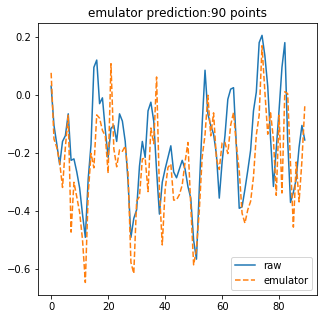